In [7]:
from cv2 import imread

In [61]:
import cv2

In [55]:
a = imread("00730.tiff")

In [56]:
a.shape

(512, 512, 3)

In [52]:
import matplotlib.pyplot as plt


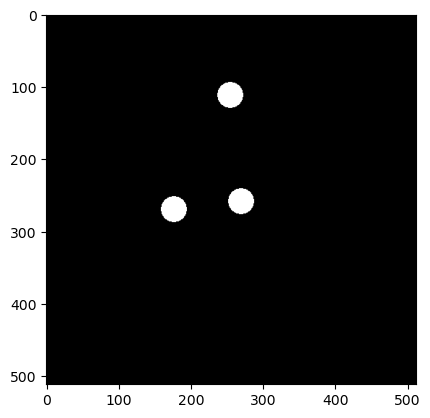

In [53]:
plt.imshow(a[:, :, 0], cmap='gray')

In [54]:
np.unique(a[:, :, 0])

array([  0, 255], dtype=uint8)

In [62]:
plt.imshow(cv2.watershed(a))

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'watershed'
> Overload resolution failed:
>  - watershed() missing required argument 'markers' (pos 2)
>  - watershed() missing required argument 'markers' (pos 2)


### Watershed Algortihm Segmentation

In [76]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("00730.tiff")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,10,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [83]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [91]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+0.5
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

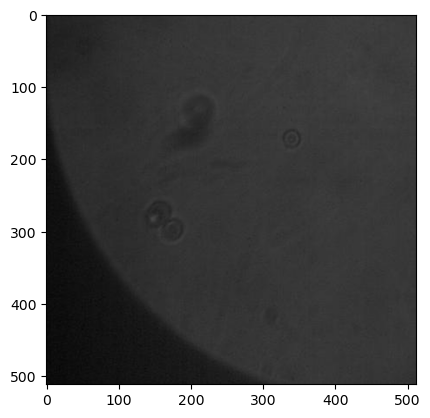

In [92]:
plt.imshow(img)

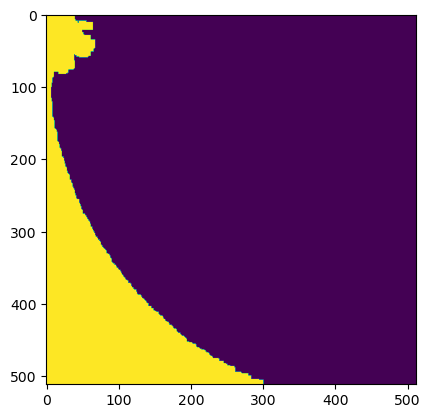

In [93]:
plt.imshow(sure_bg)

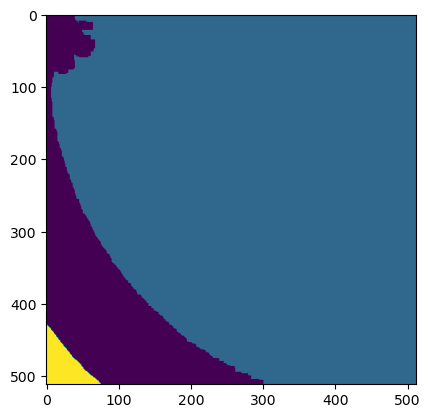

In [94]:
plt.imshow(markers)

In [111]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 3, 50)

In [112]:
circles

In [113]:
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
	# show the output image
	cv2.imshow("output", np.hstack([image, output]))
	cv2.waitKey(0)